# 1. Importe un csv

* Importe el set de datos creados por usted al final de la sesión pasada.


In [1]:
import pandas as pd

df = pd.read_csv('subsample_PCNC_demo.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (97, 10)


,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
0,2,0.743,DZA,NorthAfrica,5402.1699,39.113998,17.200001,0.53,NaN,7.207178
1,34,0.394,TCD,SubSaharian,1651.0500,NaN,89.400002,0.64,NaN,3.621164
2,0,0.479,AFG,SouthAsia,1282.6400,29.825001,NaN,0.01,NaN,8.182274
3,109,0.779,MUS,SubSaharian,10944.5400,1.261000,13.000000,3.03,21.900000,4.809545
4,113,0.701,MDA,EastEurope,4207.8701,3.555000,15.100000,9.99,23.799999,10.323656


# 2. Importe su conjunto de funciones
* Genere un archivo ancilliary_funcs.py para guardar las funciones creadas en la sesión pasada e impórtelo.
* Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra importada

In [2]:
import ancilliary_funcs as af

nans = {}
for var in df.columns[1:]:
    tot, porc = af.list_nan(df,var)
    nans[var] = porc
    print('La variable {} presenta un total de {} casos perdidos, que corresponde al {}% del total'.format(var.upper(), tot, round(porc,2)))



La variable UNDP_HDI presenta un total de 4 casos perdidos, que corresponde al 0.04% del total
La variable CCODEALP presenta un total de 0 casos perdidos, que corresponde al 0.0% del total
La variable HT_REGION presenta un total de 0 casos perdidos, que corresponde al 0.0% del total
La variable GLE_CGDPC presenta un total de 0 casos perdidos, que corresponde al 0.0% del total
La variable IMF_POP presenta un total de 23 casos perdidos, que corresponde al 0.24% del total
La variable WEF_IMORT presenta un total de 21 casos perdidos, que corresponde al 0.22% del total
La variable WHO_ALC2000 presenta un total de 6 casos perdidos, que corresponde al 0.06% del total
La variable WHO_TOBT presenta un total de 36 casos perdidos, que corresponde al 0.37% del total
La variable WDI_EXPH presenta un total de 1 casos perdidos, que corresponde al 0.01% del total


# 3. Estime el puntaje Z de una variable

Estime el puntaje Z la variables que posea la menor cantidad de datos perdidos (o que no posea).
    
* Genere una nueva columna en la tabla de datos que contenga el puntaje Z de dicha variable. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula: 
$z_i = \frac{( x_i − \bar{x} )}{ \sigma (x)}$

* Para ordenar los valores pueden utilizar la función sort_values del DataFrame analizado. Lean la documentación asociada al argumento by.

* Asegúrense de eliminar las observaciones que tengan valores perdidos con dropna. Lean la documentación asociada al argumento subset.

* Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?
Rp:  Todas las observaciones del comienzo se encuentran muy aglutinadas, a menos de una desviación standard del centro de la curva. Todas las observaciones del final se encuentran muy dispersas, a más de una desviación standard del centro de la curva.


In [3]:
nans = sorted(nans, key=nans.get, reverse=False)    

# Eliminamos las variables categóricas
nans.remove('ht_region')
nans.remove('ccodealp')

print('Ranking de menor cantidad de casos perdidos:',nans)

Ranking de menor cantidad de casos perdidos: ['gle_cgdpc', 'wdi_exph', 'undp_hdi', 'who_alc2000', 'wef_imort', 'imf_pop', 'who_tobt']


In [4]:
df.dropna(subset=[nans[0]])
mean = df[nans[0]].mean()
std = df[nans[0]].std(ddof=0)

df['Z_'+nans[0]] = (df[nans[0]]-mean)/std

head = df.sort_values(by=['Z_'+nans[0]]).head(10)
head

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,Z_gle_cgdpc
45,125,0.351,NER,SubSaharian,644.53998,NaN,NaN,0.15,8.400000,5.821299,-0.660988
22,26,0.406,BDI,SubSaharian,663.57001,NaN,66.900002,4.16,NaN,7.535565,-0.659926
47,32,0.347,CAF,SubSaharian,690.03998,NaN,NaN,1.66,NaN,4.200222,-0.658448
54,103,0.473,MWI,SubSaharian,938.34998,17.604000,46.000000,1.23,16.299999,11.377956,-0.644585
39,139,0.421,GNB,SubSaharian,961.26001,NaN,NaN,3.57,NaN,5.593137,-0.643306
85,154,0.431,SLE,SubSaharian,979.95001,6.232000,117.400002,3.78,34.400002,11.089902,-0.642263
62,70,0.414,GIN,SubSaharian,993.83002,11.745000,65.199997,0.22,NaN,5.644798,-0.641488
84,55,0.418,ERI,SubSaharian,1007.28000,NaN,NaN,0.62,NaN,3.338293,-0.640737
80,106,0.438,MLI,SubSaharian,1063.26000,14.854000,79.599998,0.61,18.600000,6.862166,-0.637612
2,0,0.479,AFG,SouthAsia,1282.64000,29.825001,NaN,0.01,NaN,8.182274,-0.625365


In [5]:
tail = df.sort_values(by=['Z_'+nans[0]]).tail(10)
tail

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,Z_gle_cgdpc
36,3,0.857,AND,WesternDem,32367.330,NaN,NaN,9.979999,33.099998,8.127135,1.110000
65,82,0.881,ITA,WesternDem,32931.672,60.783001,3.200000,7.560000,24.200001,9.247918,1.141506
30,37,NaN,TWN,EastAsia,33965.871,23.434000,3.934564,NaN,NaN,NaN,1.199242
13,167,0.909,SWE,WesternDem,39000.910,9.645000,2.300000,7.300000,21.900000,11.929840,1.480333
43,121,0.923,NLD,WesternDem,42258.352,16.865000,3.400000,8.680000,25.700001,10.897293,1.662187
93,148,NaN,SMR,WesternDem,42664.211,0.034000,NaN,NaN,NaN,6.129065,1.684844
61,23,0.864,BRN,SouthEastAsia,46103.840,0.412000,5.600000,0.970000,16.400000,2.648163,1.876869
52,127,0.948,NOR,WesternDem,57634.770,5.156000,2.200000,6.060000,24.100000,9.719718,2.520606
70,141,0.855,QAT,NorthAfrica,104049.440,2.045000,6.300000,1.150000,NaN,2.187062,5.111798
66,111,NaN,MCO,WesternDem,108481.130,NaN,NaN,NaN,NaN,4.337683,5.359206


# 4. Estime el puntaje z de las regiones

Utilizando el resultado anterior, visualice su nueva variable estandarizada (es decir, luego de calcular el puntaje Z).
* Para ello realice un dotplot que muestre el valor promedio de su variable por cada región
* Agregue además una línea que muestre el promedio total de la variable (es decir, antes de agrupar).

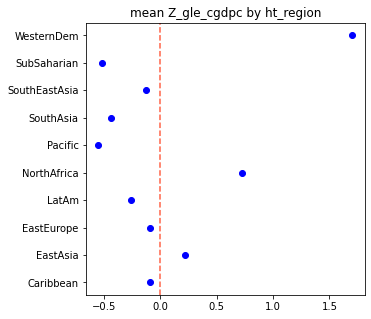

In [6]:
af.dotplot(df,'Z_gle_cgdpc','ht_region','mean', True)

# 5. Curvas de Densidad de Probabilidad

* Genere una función que permita visualizar las curvas de Densidad de Probabilidad para las variables imf_pop, gle_cgdpc y wdi_exph.
* La función debe contener como argumentos:
    * df: Tabla de datos 1.
    * variable: Variable a contrastar.




In [7]:
import matplotlib.pyplot as plt

def pdf(df,var):
    plt.hist(df[var], color='blue', alpha=1, density=True)
    plt.title('Curva de Densidad de Probabilidad de la variable {} '.format(var.upper()))


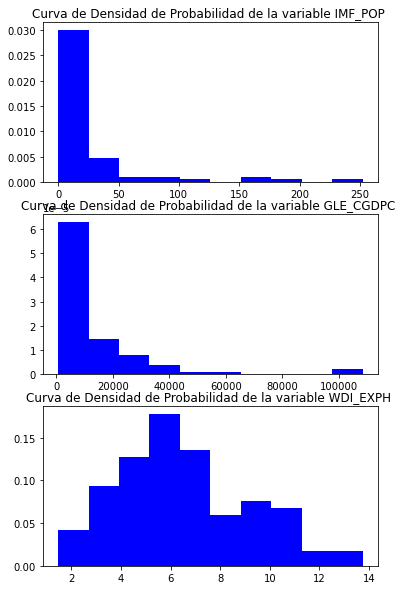

In [8]:
vars = ['imf_pop', 'gle_cgdpc', 'wdi_exph']

row = 1
plt.rcParams["figure.figsize"] = (6, 10) # Tamaño gráficos
for var in vars:
  plt.subplot(len(vars), 1, row)
  pdf(df, var)
  row += 1
